<a href="https://colab.research.google.com/github/sanjulikasharma/MachineLearning/blob/main/Object_detection_using_SSD_Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt


In [2]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz


--2023-11-15 06:37:47--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.15.251, 172.217.164.27, 172.217.0.91, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.15.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20518283 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.57M  --.-KB/s    in 0.1s    

2023-11-15 06:37:47 (170 MB/s) - ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’ saved [20518283/20518283]



In [3]:
!tar -xzvf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz


ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [5]:
model = tf.saved_model.load("ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model")

image = Image.open("detect.jpg")
image_np = np.array(image)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)

detection = model(input_tensor)

In [6]:
# Parse the detection results
boxes = detection['detection_boxes'].numpy()
classes = detection['detection_classes'].numpy().astype(int)
scores = detection['detection_scores'].numpy()

In [7]:
!wget https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt

with open("coco-labels-2014_2017.txt", "r") as file:
    labels = file.read().splitlines()


--2023-11-15 06:40:42--  https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620 [text/plain]
Saving to: ‘coco-labels-2014_2017.txt’

coco-labels-2014_20 100%[===================>]     620  --.-KB/s    in 0s      

2023-11-15 06:40:42 (45.9 MB/s) - ‘coco-labels-2014_2017.txt’ saved [620/620]



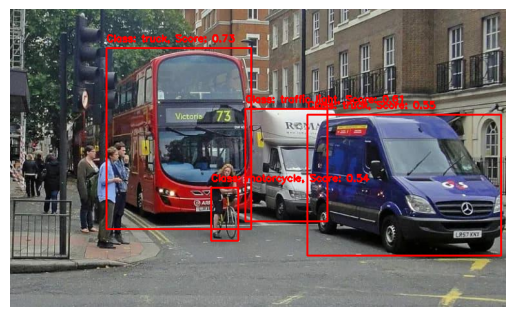

In [8]:
for i in range(classes.shape[1]):
    class_id = int(classes[0, i])
    score = scores[0, i]

    if np.any(score > 0.5):  # Filter out low-confidence detections
        h, w, _ = image_np.shape
        ymin, xmin, ymax, xmax = boxes[0, i]

        # Convert normalized coordinates to image coordinates
        xmin = int(xmin * w)
        xmax = int(xmax * w)
        ymin = int(ymin * h)
        ymax = int(ymax * h)

        # Get the class name from the labels list
        class_name = labels[class_id + 1]

        # Draw bounding box and label on the image
        cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        label = f"Class: {class_name}, Score: {score:.2f}"
        cv2.putText(image_np, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the result
plt.imshow(image_np)
plt.axis('off')
plt.show()